## Linear Regression and Boston Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Column names for the feature columns
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Create a DataFrame for the features
df_features = pd.DataFrame(data, columns=columns)

# Add the target column (MEDV) to the DataFrame
df_features['MEDV'] = target

df = df_features.copy()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [2]:
print(f"Shape: {df.shape}\n\nDtypes: {df.dtypes}\n\nColunn Names: {df.columns}")

Shape: (506, 14)

Dtypes: CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Colunn Names: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


### Plot the scatter plot of each attribute versus MEDV using subplots

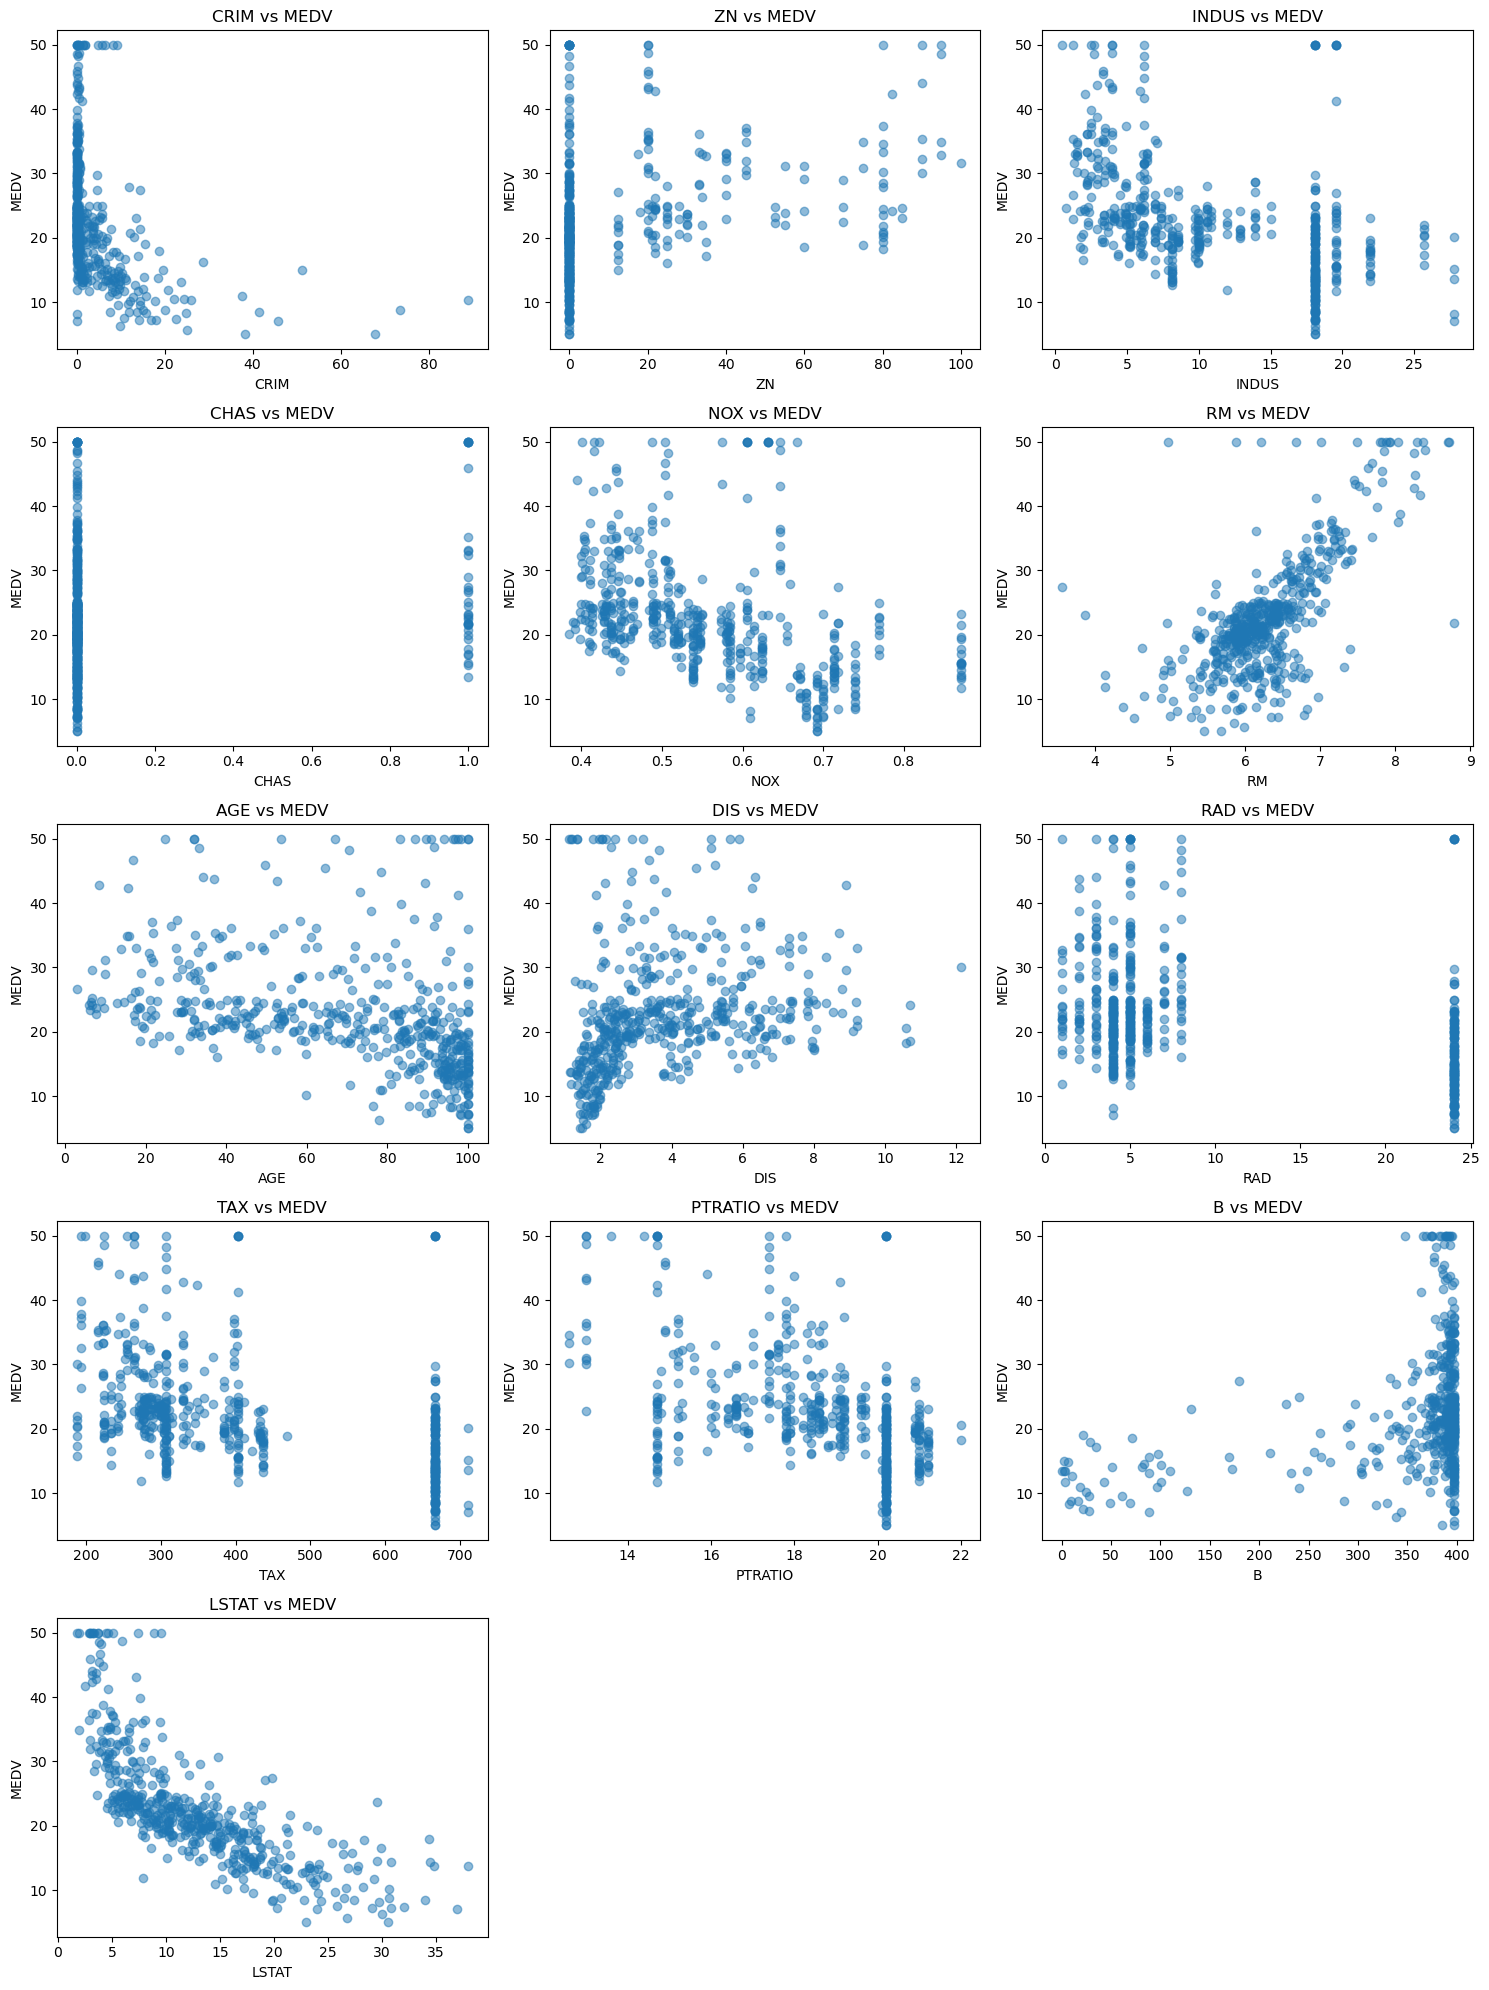

In [3]:
# Assuming df_features is your DataFrame with the attributes and target column 'MEDV'
attributes = df_features.columns[:-1]  # Exclude the 'MEDV' column from the attribute list

# Number of features
num_features = len(attributes)

# Create a figure with a grid of 3 columns and 5 rows
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

# Flatten the 2D array of axes for easy iteration
axs = axs.flatten()

# Loop through each attribute and create a scatter plot in the appropriate subplot
for i, attribute in enumerate(attributes):
    axs[i].scatter(df_features[attribute], df_features['MEDV'], alpha=0.5)
    axs[i].set_title(f'{attribute} vs MEDV')
    axs[i].set_xlabel(attribute)
    axs[i].set_ylabel('MEDV')

# Hide any unused subplots (if any)
for j in range(num_features, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

### Assign data to X and target to y

In [4]:
"""

X = data
y = target

"""

from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns='MEDV')
y = df['MEDV']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")

Training features shape: (404, 13)
Test features shape: (102, 13)
Training target shape: (404,)
Test target shape: (102,)


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Initialize the LinearRegression model
model = LinearRegression()

# Perform 10-fold cross-validation on the training data
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')  # Using R^2 scoring

# Print the mean score
mean_cv_score = cv_scores.mean()
print(f"Mean cross-validation score (R^2) for LinearRegression: {mean_cv_score:.4f}")

Mean cross-validation score (R^2) for LinearRegression: 0.6987


### Do the same two steps above for random forest regressor

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation on the training data
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='r2')  # Using R^2 scoring

# Print the mean score
mean_rf_cv_score = rf_cv_scores.mean()
print(f"Mean cross-validation score (R^2) for RandomForestRegressor: {mean_rf_cv_score:.4f}")


Mean cross-validation score (R^2) for RandomForestRegressor: 0.8200


### Boston Housing Data with Polynomials
#### Transform the Boston House dataset and split the dataset into test and train datasets
#### Run cross-validation
#### Plot the coefficients of the model

Mean cross-validation score (R^2) for Polynomial Regression: 0.7481


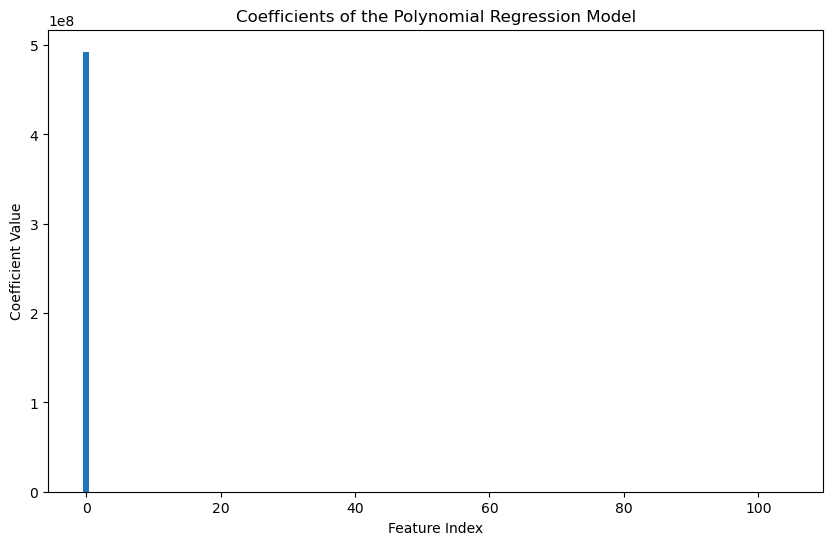

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Define features and target
X = df.drop(columns='MEDV')
y = df['MEDV']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with PolynomialFeatures and LinearRegression
degree = 2  # Adjust the degree as needed
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('model', LinearRegression())
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='r2')
mean_cv_score = cv_scores.mean()
print(f"Mean cross-validation score (R^2) for Polynomial Regression: {mean_cv_score:.4f}")

# Fit the model to the training data
pipeline.fit(X_train, y_train)

# Get the coefficients of the model
coefficients = pipeline.named_steps['model'].coef_

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients)
plt.title('Coefficients of the Polynomial Regression Model')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.show()

In [8]:
coefficients

array([ 4.92670936e+08, -7.22764160e+00,  6.67086755e-01, -4.72217487e+00,
        3.67380792e+01,  2.85260265e+02,  1.78379151e+01,  6.68866347e-01,
       -4.11188842e+00,  2.66059410e+00, -1.46950001e-02,  7.64961406e+00,
        1.27570586e-01, -2.08658411e-01,  3.27731940e-04,  7.10015719e-02,
        6.00285817e-01,  2.59545312e+00, -2.00102212e+00,  1.66017685e-01,
       -7.59818888e-03, -2.66559397e-01,  2.45334574e-01, -3.50682994e-02,
        7.23569716e-01, -5.20177924e-04,  3.43050134e-02, -5.54677296e-04,
       -4.45080285e-03, -7.68067785e-02, -1.38274866e+00, -3.96057200e-03,
        1.24336678e-03, -2.15743502e-02, -2.07493712e-02,  8.62540516e-04,
       -5.39598908e-03,  2.47093036e-04, -9.15557462e-03,  5.49715802e-02,
       -2.06153046e-04, -2.23868462e-01,  2.88547653e-01,  5.21287078e-03,
        1.73336133e-01,  1.92780222e-02, -1.01743831e-03, -3.39786412e-02,
        4.63990125e-03, -1.83599622e-02,  3.67380811e+01, -3.67205525e+01,
       -5.27074751e+00, -